### Estonian data description

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
estnews = pd.read_parquet('all-est-news.parquet')

estnewsf = estnews.copy(deep=True)
estnewsf = estnewsf[['EstText Index', 'URL', 'Publish_Date']]
estnewsf['Year'] = estnewsf['Publish_Date'].str.slice(0, 4)
estnewsf = estnewsf.dropna(subset=['Year'])
estnewsf['Year'] = estnewsf['Year'].astype(int)
estyearcounts = estnewsf['Year'].value_counts().sort_index()
# estyearcounts.index = ['2012' if year <= 2012 else str(year) for year in estyearcounts.index]
# estyearcounts = estyearcounts.groupby(estyearcounts.index).sum()
# estyearcounts.index = ['<' if year == '2012' else str(year) for year in estyearcounts.index]

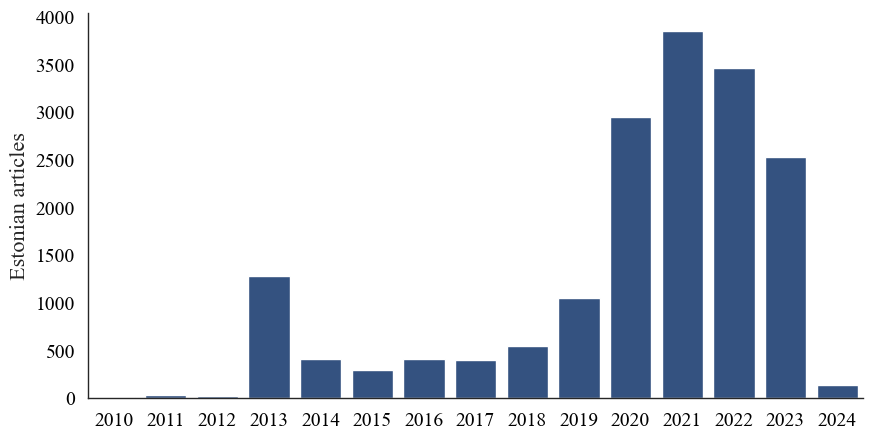

In [47]:
font_family = 'Times New Roman'
label_size = 16
tick_size = 14
alpha = 1
bar_color = '#284F8C'

sns.set_theme(style="white")
plt.rc('font', family=font_family)

plt.figure(figsize=(10, 5))

ax = sns.barplot(x=estyearcounts.index, y=estyearcounts.values, color=bar_color, alpha=alpha)

plt.xlabel('', fontsize=label_size, fontfamily=font_family)
plt.ylabel('Estonian articles', fontsize=label_size, fontfamily=font_family)

ax.tick_params(axis='both', labelsize=tick_size, labelcolor='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

plt.show()